# Final Project - Understand the coffee Consumption spread over Toronto

##### Import required libray

In [1]:
import pandas as pd
!conda install -c conda-forge/label/cf201901 wikipedia
import wikipedia as wp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from geopy.geocoders import Nominatim
import requests
import json
from pandas.io.json import json_normalize
import numpy as np

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - wikipedia


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2p             |       h470a237_2         3.1 MB  conda-forge/label/cf201901
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge/label/cf201901
    ca-certificates-2018.11.29 |       ha4d7672_0         143 KB  conda-forge/label/cf201901
    wikipedia-1.4.0            |           py35_0          20 KB  conda-forge/label/cf201901
    ------------------------------------------------------------
                                           Total:         3.4 MB

The following NEW packages will be INSTALLED:

    wikipedia:       1.4.0-py35_0      conda-forge/label/cf201901

The following packages will be UPDATED:

    certifi:         2018.8.24-py35_1                

##### Getting Toronto city data

In [2]:
html = wp.page("List_of_postal_codes_of_Canada:_M").html().encode("UTF-8")
Toronto_df = pd.read_html(html)[0]
Toronto_df.columns=Toronto_df.iloc[0]
Toronto_df=Toronto_df.reindex(Toronto_df.index.drop(0))
Toronto_database=Toronto_df[Toronto_df['Borough']!='Not assigned']
Toronto_database=Toronto_database.reset_index()
Toronto_database=Toronto_database.drop('index',1)
Toronto_database1=Toronto_database[Toronto_database['Neighbourhood']=='Not assigned']
Toronto_database1=Toronto_database1.drop('Neighbourhood',1)
Toronto_database1['Neighbourhood']=Toronto_database1['Borough']
Toronto_database=Toronto_df[Toronto_df['Neighbourhood']!='Not assigned']
Toronto_database=Toronto_database.append(Toronto_database1)


(211, 3)

In [3]:
TDF=Toronto_database.groupby('Postcode').agg({
                'Borough': lambda x: x.unique(),
                'Neighbourhood': lambda x: ', '.join(x)
    })

TDF=TDF.reset_index()
geodf=pd.read_csv('http://cocl.us/Geospatial_data')

geodf = geodf.rename(columns = {"Postal Code": "Postcode", 
                                  "Latitude":"Latitude", 
                                  "Longitude": "Longitude"}) 
Toronto_DB = pd.merge(TDF,
                 geodf[['Postcode','Latitude', 'Longitude']],
                 on='Postcode')

Toronto_DB=Toronto_DB[['Postcode','Borough','Neighbourhood','Latitude','Longitude']]
Toronto_DB

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [28]:
Toronto_DB.shape

(103, 5)

### Get venues detail for Toronto

In [4]:
CLIENT_ID = '2HJUONTVXJVO3S0M4DBWEDOJBYYWHW4RYR0B04OIT3STCFCB' # your Foursquare ID
CLIENT_SECRET = 'ER505YC0NL5G4EOGQQUK5QJOZ30QAXEQD3T2A3MCMSHNFBCO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [5]:
neighbourhood_latitude = Toronto_DB.loc[0, 'Latitude'] # neighbourhood latitude value
neighbourhood_longitude = Toronto_DB.loc[0, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = Toronto_DB.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Rouge, Malvern are 43.806686299999996, -79.19435340000001.


In [6]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighbourhood_latitude, neighbourhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Wendy's,Fast Food Restaurant,43.807448,-79.199056
1,Interprovincial Group,Print Shop,43.805630,-79.200378


In [8]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
Torront_venues = getNearbyVenues(names=Toronto_DB['Neighbourhood'],
                                   latitudes=Toronto_DB['Latitude'],
                                   longitudes=Toronto_DB['Longitude']
                                  )
Torront_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge, Malvern",43.806686,-79.194353,Interprovincial Group,43.805630,-79.200378,Print Shop
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Chris Effects Painting,43.784343,-79.163742,Construction & Landscaping
3,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place


#### To understand the Coffee Consumption or demand, i have to consider rows where Venue Category are related to Coffee shope, hotel 
        

In [10]:
Torront_venues=pd.merge(Torront_venues,Toronto_DB)
Torront_venues1=Torront_venues.drop(['Latitude','Longitude','Neighbourhood Latitude','Neighbourhood Longitude','Venue Latitude','Venue Longitude'],axis=1)
Torront_venuesf=Torront_venues1[['Postcode','Borough','Neighbourhood','Venue','Venue Category']]
Torront_venuesf_1=Torront_venuesf[Torront_venuesf['Venue Category'].isin(['Café','Cafeteria','Coffee Shop'])]
Torront_venuesf_1['Category']='Coffee Shop'
Torront_venuesf_2=Torront_venuesf[Torront_venuesf['Venue Category'].str.contains('Restaurant')]
Torront_venuesf_2['Category']='Resturant'


Torront_db=Torront_venuesf_1.append(Torront_venuesf_2)
Torront_db.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Postcode,Borough,Neighbourhood,Venue,Venue Category,Category
13,M1G,Scarborough,Woburn,Starbucks,Coffee Shop,Coffee Shop
14,M1G,Scarborough,Woburn,Tim Hortons,Coffee Shop,Coffee Shop
27,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",Tim Hortons,Coffee Shop,Coffee Shop
43,M1N,Scarborough,"Birch Cliff, Cliffside West",The Birchcliff,Café,Coffee Shop
81,M1W,Scarborough,L'Amoreaux West,Tim Hortons,Coffee Shop,Coffee Shop


In [11]:
# one hot encoding
NorthYork_onehot = pd.get_dummies(Torront_db[['Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
NorthYork_onehot['Borough'] = Torront_db['Borough'] 

# move neighbourhood column to the first column
fixed_columns = [NorthYork_onehot.columns[-1]] + list(NorthYork_onehot.columns[:-1])
NorthYork_onehot = NorthYork_onehot[fixed_columns]

NorthYork_onehot.head()

,Borough,Coffee Shop,Resturant
13,Scarborough,1,0
14,Scarborough,1,0
27,Scarborough,1,0
43,Scarborough,1,0
81,Scarborough,1,0


### Study the data to summaryise

# How the bussines spreaded over various location of Toronto. Where is more demand. It will help to understand to more potential

In [12]:
Torront=NorthYork_onehot.groupby(by=['Borough']).agg({'Coffee Shop':'sum','Resturant':'sum'})
Torront['Total_Rest']=Torront['Coffee Shop']+Torront['Resturant']
Torront.sort_values(by=['Total_Rest'], ascending=False)

,Coffee Shop,Resturant,Total_Rest
Borough,,,
Downtown Toronto,194,312.0,506.0
North York,24,66.0,90.0
West Toronto,20,44.0,64.0
East Toronto,12,30.0,42.0
Central Toronto,14,22.0,36.0
Scarborough,5,26.0,31.0
Queen's Park,10,11.0,21.0
East York,6,8.0,14.0
Etobicoke,6,8.0,14.0


## Observation: Downtown Toronto has higest demand on coffee, then North York and the West Toronto so on.

As I am rew coffee supplie, it has helped me to take decssion to have major storage wear house newar to Downtown Toronto, North York & West Toronto

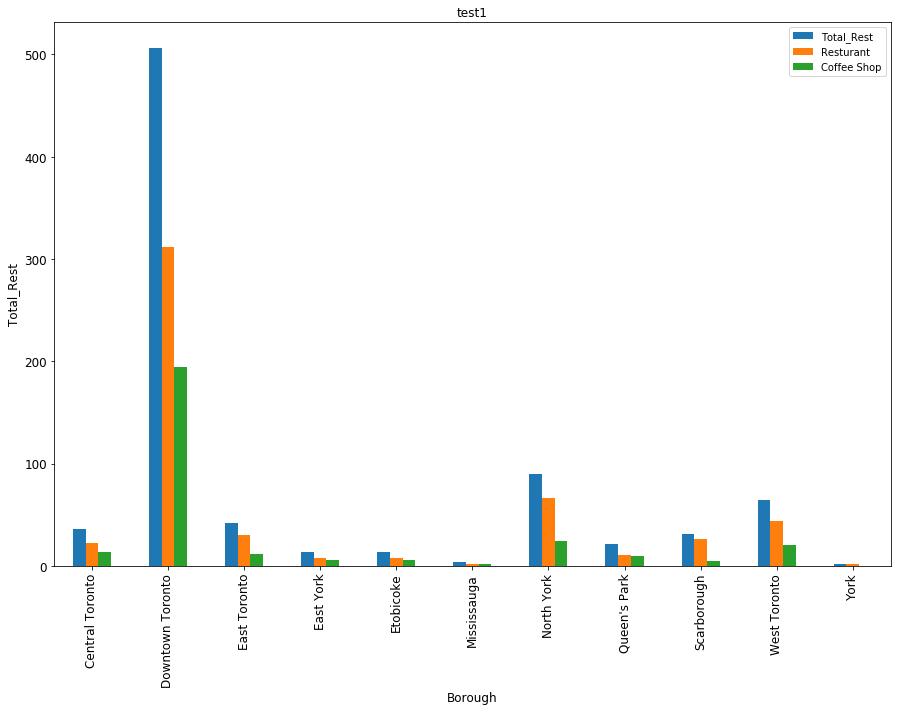

In [13]:
ax=Torront[['Total_Rest','Resturant','Coffee Shop']].plot(kind='bar',title='test1', figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Borough", fontsize=12)
ax.set_ylabel("Total_Rest", fontsize=12)
plt.show()

Above chart demonstrae the demand distrubuted across Toronto

In [32]:
Torront_venues=pd.merge(Torront_venues,Toronto_DB)
Torront_venuesf_1=Torront_venues[Torront_venues['Venue Category'].isin(['Café','Cafeteria','Coffee Shop'])]
Torront_venuesf_1['Category']='Coffee Shop'
Torront_venuesf_2=Torront_venues[Torront_venues['Venue Category'].str.contains('Restaurant')]
Torront_venuesf_2['Category']='Coffee Shop'


Torront_db=Torront_venuesf_1.append(Torront_venuesf_2)


map_Torront = folium.Map(location=[43.679563, -79.377529], zoom_start=11,tiles='Stamen Terrain')
for lat, lng, Neighbourhood in zip(Torront_db['Latitude'], Torront_db['Longitude'], Torront_db['Neighbourhood']):
    label = '{}'.format(Neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Torront)  
    
map_Torront

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## on above map, it clear the density of Coffee Shop

### -------------------------------------------------------------------------

### Downtown Toronto has more densite of Coffee shope, which has clearly define the higest demand of Coffe.

### For me busness, it has more potential to invest to grow the business, I want to drill down more on "Downtown Toronto"

In [15]:
Downtown_Toronto=Torront_venues[Torront_venues['Borough']=='Downtown Toronto']
Downtown_Toronto.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Postcode,Borough,Latitude,Longitude
548,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground,M4W,Downtown Toronto,43.679563,-79.377529
549,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park,M4W,Downtown Toronto,43.679563,-79.377529
550,Rosedale,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park,M4W,Downtown Toronto,43.679563,-79.377529
551,Rosedale,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail,M4W,Downtown Toronto,43.679563,-79.377529
552,"Cabbagetown, St. James Town",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner,M4X,Downtown Toronto,43.667967,-79.367675


In [23]:
Downtown_Toronto=Torront_venues[Torront_venues['Borough']=='Downtown Toronto']

Downtown_Toronto_1=Downtown_Toronto[Downtown_Toronto['Venue Category'].isin(['Café','Cafeteria','Coffee Shop'])]
Downtown_Toronto_2=Downtown_Toronto[Downtown_Toronto['Venue Category'].str.contains('Restaurant')]
Downtown_Toronto=Downtown_Toronto_1.append(Downtown_Toronto_2)
#Downtown_Toronto.columns=['Neighbourhood','Latitude','Longitude','No_Coffee_Shop']
Downtown_Toronto.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Postcode,Borough,Latitude,Longitude
557,"Cabbagetown, St. James Town",43.667967,-79.367675,Merryberry Cafe + Bistro,43.666630,-79.368792,Café,M4X,Downtown Toronto,43.667967,-79.367675
558,"Cabbagetown, St. James Town",43.667967,-79.367675,Cabbagetown Brew,43.666923,-79.369289,Café,M4X,Downtown Toronto,43.667967,-79.367675
576,"Cabbagetown, St. James Town",43.667967,-79.367675,Jetfuel Coffee,43.665295,-79.368335,Coffee Shop,M4X,Downtown Toronto,43.667967,-79.367675
577,"Cabbagetown, St. James Town",43.667967,-79.367675,Tim Hortons,43.667169,-79.368849,Coffee Shop,M4X,Downtown Toronto,43.667967,-79.367675
583,"Cabbagetown, St. James Town",43.667967,-79.367675,Tim Hortons,43.665786,-79.368284,Coffee Shop,M4X,Downtown Toronto,43.667967,-79.367675


In [24]:
map_Downtown_Toronto = folium.Map(location=[43.679563, -79.377529], zoom_start=13,tiles='Stamen Terrain')
for lat, lng, Neighbourhood in zip(Downtown_Toronto['Latitude'], Downtown_Toronto['Longitude'], Downtown_Toronto['Neighbourhood']):
    label = '{}'.format(Neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Downtown_Toronto)  
    
map_Downtown_Toronto

In [26]:
from folium import plugins
Downtown_Toronto_map = folium.Map(location = [43.679563, -79.377529], zoom_start = 12)
incidents = plugins.MarkerCluster().add_to(Downtown_Toronto_map)

for lat, lng, label, in zip(Downtown_Toronto['Neighbourhood Latitude'], Downtown_Toronto['Neighbourhood Longitude'],Downtown_Toronto['Venue Category']):
    folium.Marker(location=[lat, lng],
                  icon=None,
                  popup=label,
                 ).add_to(incidents)

# display map
Downtown_Toronto_map


### Summary of Out Come from above study:

        Coffee basicaly sold in "Coffee Shop" & "Restrurant".
        First I get Toronto city data and i got venue detail.
        Filter data based on Coffee Shop & Resturant to Analys.
        
        "Downtown Toronto" is higest demanding place...
        Downtown Toronto contrubute 61.6%  of total demand of Toronto.
        North York contrubute 10.9% of total demand of Toronto
        
        Rest Area contribute 27.5% of Toronto demand.
        
        As i am working for raw coffee supplier, it conclude me to have godown near to "Downtown Toronto"
        which help me to supply maximum to with respect demand.
         
        